In [1]:
import os
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic = sns.load_dataset('titanic')


Sklearn uses a matrix, not a dataframe, so in the last preprocessing step I will change the dataframe into a matrix. 

Earlier I will have to replace columns containing category data with dichotomous variables. The who column has for example three categories - we will change it into two zero-one (dichotomous) columns (we don't need three columns in this case - the third one would carry redundant information in relation to the two previous ones). To replace category columns with dichotomous ones we will use the function pd.get_dummies.

Sometimes using pd.get_dummies is not good, but in this dataset the third categoree is not useful as there is not much of it, so I am able to remove it and use pd.get_dummies instead of OneHotEncoding



Sklearn używa macierzy, nie dataframe, więc w ostatnim kroku preprocessingu zamienię dataframe na macierz. 

Wcześniej będę musiała zamienić kolumny zawierające dane kategorialne na zmienne dychotomiczne. Kolumna 'who' ma np. trzy kategorie - zamienimy ją na dwie kolumny zero-jedynkowe (dychotomiczne) (nie potrzebujemy w tym przypadku trzech kolumn - trzecia niosłaby zbędne informacje w stosunku do dwóch poprzednich). Do zamiany kolumn kategorialnych na dychotomiczne posłuży nam funkcja pd.get_dummies.

Czasami użycie pd.get_dummies nie jest dobrym pomysłem, ale w tym zbiorze danych trzecia kategoria nie jest przydatna, ponieważ nie ma jej o zbyt wiele, więc mogę je usunąć i użyć pd.get_dummies zamiast OneHotEncoding.



In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


First, I will select only continious columns - pclass (ticket class), age (age), sibsp (number of siblings or spouses on board), parch (number of parents / children on board), farcolumns and create a new DataFrame titanic_selected.

Po pierwsze, wybiorę tylko ciągłe kolumny - pclass, age, sibsp, parch, fee utworzę nowy DataFrame titanic_selected.



In [3]:
titanic_selected = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']]

In [4]:
titanic_selected.head()

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


Next, I will deal with columns with category variables. Let's deal with gender first: the sex column. I will use use the pd.get_dummies column to specify sex and use drop_first=True to get one column less than the number of categories (to avoid redundant information):

Następnie zajmę się kolumnami ze zmiennymi kategorialnymi. Zajmijmy się najpierw płcią: kolumną sex. Użyję kolumny pd.get_dummies do określenia płci i użyję drop_first=True, aby uzyskać jedną kolumnę mniej niż liczba kategorii (aby uniknąć nadmiarowych informacji):

In [5]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['sex', 'alone', 'who'], drop_first=True)

In [6]:
titanic_with_dummies.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,sex_male,alone_True,who_man,who_woman
0,0,3,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,1,0,1,0
1,1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,0,0,0,1
2,1,3,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,0,1,0,1
3,1,1,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,1,1,1,0


Unfortunately, pd.get_dummies() returns the whole original dataframe with new columns showing added variables, while I only want the converted ones. Therefore, after using the get_dummies I select the converted columns ourselves using the .loc method.

Niestety, pd.get_dummies() zwraca nam całą oryginalną ramkę danych z nowymi kolumnami pokazującymi dodane zmienne, podczas gdy my chcemy tylko te przekonwertowane. Dlatego po użyciu get_dummies wybieram przekonwertowane kolumny za pomocą metody .loc.

In [7]:
titanic_only_dummies = titanic_with_dummies.loc[:, ['sex_male', 'alone_True', 'who_man', 'who_woman']]

I can now merge two dataframes (titanic_selected and titanic_only_dummies) together using the function pd.concat(). I will use the name argument axis=1 to merge the dataframes in the column axis (the first axis axis=0 is the row, the second axis axis=1 is the column).

Mogę teraz połączyć dwa zbiora danych (titanic_selected i titanic_only_dummies) razem przy pomocy funkcji pd.concat(). Użyję argumentu axis=1 do połączenia zbioró danych w osi kolumnowej (pierwsza oś axis=0 to wiersz, druga axis=1 to kolumna).

In [8]:
titanic_preproc = pd.concat(objs = [titanic_selected, titanic_only_dummies], axis=1)

In [9]:
titanic_preproc.head()

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,1,0


Next, I willget rid of the missing values. The simplest thing to do this  is: throw out all the lines (rows) with any missing data in them. There are also other ways of dealing with missing data - we can replace the missing data in a given column by the mean or median of this column. One of the best ways of imputation is a  the k-nearest neighbor (kNN method). Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

Następnie pozbędziemy się brakujących wartości. Najprościej jest to zrobić w ten sposób, że wyrzucamy wszystkie wiersze, w których brakuje danych. Istnieją również inne sposoby radzenia sobie z brakującymi danymi - możemy zastąpić brakujące dane w danej kolumnie średnią lub medianą tej kolumny. Jedną z najlepszych metod imputacji jest metoda k-najbliższych sąsiadów (kNN). Brakujące wartości w każdej próbce imputowane są przy użyciu średniej wartości z najbliższych sąsiadów znalezionych w zbiorze treningowym. Dwie próbki są bliskie, jeśli cechy, których brakuje w żadnej z nich, są bliskie.



In the cell below, we can see that the column 'age' has 177 missing values. 

W komórce poniżej widzimy, że w kolumnie "age" brakuje 177 wartości. 

In [11]:
titanic_preproc.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
alone_True      0
who_man         0
who_woman       0
dtype: int64

So here I am importin KNNImputer for imputation of missing values only in 1 column - age.

Więc tutaj importuję KNNImputer do imputacji brakujących wartości tylko w 1 kolumnie - age.

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_data = imputer.fit_transform(titanic_preproc)
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = titanic_preproc.columns
titanic_preproc['age'] = df_temp['age'] 

<AxesSubplot:>

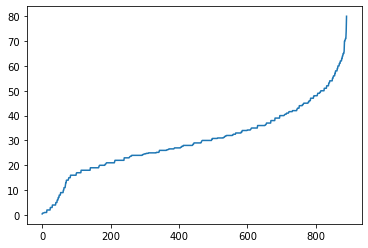

In [28]:
titanic_preproc.sort_values('age').reset_index(drop=True).age.plot()

In [23]:
#Checking if everything is ok
titanic_preproc.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
alone_True    0
who_man       0
who_woman     0
dtype: int64

Now I will save my data into the folder for easier use.


In [27]:
titanic_preproc.to_csv('titanic_preproc.csv')

Dividing data into test and train data

I am interested in survival prediction, i.e. the survived column, so I will save it in the numpy format in the variable y.


In [32]:
y = titanic.survived.values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [34]:
#Deviding data into test and train

X_train, X_test, y_train, y_test = train_test_split(
    titanic_preproc.values, y, test_size=0.2, random_state = 42)

In [35]:
X_train.shape

(712, 9)

In [36]:
X_test.shape

(179, 9)

In [37]:
y_train.shape

(712,)

In [38]:
y_test.shape

(179,)

In [59]:
titanic_for_corr = pd.concat(objs = [titanic_preproc, titanic.survived], axis=1)

In [60]:
titanic_for_corr

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman,survived
0,3,22.0,1,0,7.2500,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,1
2,3,26.0,0,0,7.9250,0,1,0,1,1
3,1,35.0,1,0,53.1000,0,0,0,1,1
4,3,35.0,0,0,8.0500,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,1,0,0
887,1,19.0,0,0,30.0000,0,1,0,1,1
888,3,29.2,1,2,23.4500,0,0,0,1,0
889,1,26.0,0,0,30.0000,1,1,1,0,1


In order to decide which columns we will use ay first for the prediction, I will create a heatmap od correlation between the variables. There we can see, that the most high correlation level with survived column have.

W celu podjęcia decyzji, które kolumny wykorzystamy w pierwszej kolejności do predykcji, stworzę korelacji pomiędzy zmiennymi. 

<AxesSubplot:>

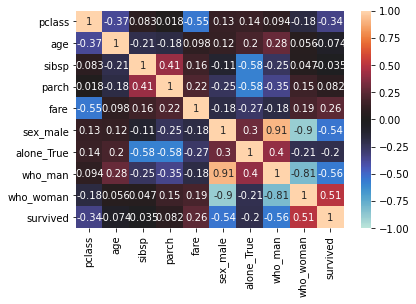

In [62]:
sns.heatmap(titanic_for_corr.corr(), annot=True, vmax=1, vmin=-1, center=0)

So after short analysis, we can see, that there is a high level of correlation between survival and fare, sex (who_woman).

Tak więc po krótkiej analizie widzimy, że istnieje wysoki poziom korelacji pomiędzy przeżywalnością a taryfą, płcią (who_woman).

In [68]:
titanic_preproc

,pclass,age,sibsp,parch,fare,sex_male,alone_True,who_man,who_woman
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,1,0
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,1,0
887,1,19.0,0,0,30.0000,0,1,0,1
888,3,29.2,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,1,0


In [69]:
xtrain = X_train[:, [0, 1, -2]]
xtest = X_test[:, [0, 1, -2]]

In [73]:
#Using the StandardScaler and its method .fit_transform() to quickly standardize
#each variable (column) in the training and test sets.

#Używam StandardScaler i jego metody .fit_transform() do szybkiej standaryzacji każdą zmienną
#w zbiorach treningowych i testowych.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(xtrain)
X_test_std = std.fit_transform(xtest)

In [75]:
X_test_std[:,0]

array([ 0.88742288, -0.25537349,  0.88742288, -0.25537349,  0.88742288,
       -1.39816986,  0.88742288,  0.88742288,  0.88742288, -1.39816986,
       -1.39816986,  0.88742288,  0.88742288,  0.88742288, -0.25537349,
       -1.39816986, -1.39816986,  0.88742288, -0.25537349, -1.39816986,
        0.88742288, -1.39816986,  0.88742288,  0.88742288,  0.88742288,
        0.88742288, -1.39816986, -0.25537349,  0.88742288,  0.88742288,
        0.88742288,  0.88742288, -1.39816986,  0.88742288,  0.88742288,
        0.88742288, -1.39816986,  0.88742288, -1.39816986,  0.88742288,
       -0.25537349,  0.88742288,  0.88742288,  0.88742288,  0.88742288,
        0.88742288,  0.88742288,  0.88742288,  0.88742288, -1.39816986,
        0.88742288, -1.39816986,  0.88742288, -1.39816986,  0.88742288,
       -1.39816986, -0.25537349, -1.39816986, -0.25537349,  0.88742288,
        0.88742288, -0.25537349, -0.25537349, -1.39816986,  0.88742288,
       -0.25537349, -0.25537349,  0.88742288,  0.88742288, -1.39

In [77]:
#Adjusting the logistic regression to the standardised data:
#Dostosowanie regresji logistycznej do danych znormalizowanych:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_std, y_train)

LogisticRegression()

In [78]:
#Testing for correctness on test data
#Testowanie poprawności na danych testowych
predictions = logistic_model.predict(X_test_std)

In [79]:
(predictions == y_test).mean()

0.7877094972067039

In [80]:
#In the case of the titanic data, we will not achieve a higher correctness than 78.7%
#by logistic regression, therefore we will try a different classifier - the support vector machine (SVM).

#W przypadku danych z titanica, nie uzyskamy wyższej poprawności niż 78.7% przy użyciu regresji logistycznej,
#dlatego spróbujemy innego klasyfikatora - maszyny wektorów podporowych (SVM).

from sklearn.svm import SVC
d= {}
for gm in [0.001, 0.1, 0.5, 0.75, 0.9, 1, 1.5, 2, 3, 5, 10, 25]:
    for c in [0.5,1,1.5,2,2.5, 3,5,10,25,50,100,500]:
        svc = SVC(gamma = gm, C = c)
        svc.fit(X_train_std, y_train) # using train data
        d[(gm,c)] = (svc.predict(X_test_std) == y_test).mean() # using test data

svc = SVC(gamma=max(d, key=d.get)[0], C = max(d, key=d.get)[1]) # best accuracy for these parameters
svc.fit(X_train_std, y_train) # using train data
np.mean(svc.predict(X_test_std) == y_test) # using test data

0.8268156424581006


C is a hypermeter which is set before the training model and used to control error and Gamma is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary.


C jest parametrem, który jest ustawiony przed trenowaniem modelu i służy do kontroli błędu, a Gamma jest również paremetrem, który jest ustawiony przed trenowaniem modelu i służy do nadawania wagi krzywizny granicy decyzyjnej.

In [81]:
svc.gamma

10

In [82]:
svc.C

500

In [83]:
max(d.values()), max(d, key=d.get)

(0.8268156424581006, (10, 500))

In [84]:
# Or we can use an automatic selection of hyperparameters

parameters = {'gamma': [0.01, 0.1, 1, 2, 5], 'C': [0.1, 1, 10, 100, 1000]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(X_train_std, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 2, 5]})

In [85]:
#Cheching the best parameters
clf.best_params_

{'C': 100, 'gamma': 5}

In [86]:
np.mean(clf.predict(X_test_std) == y_test)

0.8044692737430168

Although we used a more complicated classifier, we achieved only a slightly higher correctness
than with relatively simple logistic regression. Sometimes the dependencies present in the data are not so complex that it is necessary to use complex algorithms.

Pomimo zastosowania bardziej skomplikowanego klasyfikatora, osiągnęliśmy tylko nieznacznie wyższą poprawność
niż w przypadku stosunkowo prostej regresji logistycznej. Czasami zależności występujące w danych nie są na tyle złożone, aby konieczne było stosowanie skomplikowanych algorytmów.


Another way of predicting the survival that we can use is a Decision Tree.
Innym sposobem przewidywania przeżywalności, który możemy zastosować jest drzewo decyzyjne.

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [92]:
y_pred = model_tree.predict(X_test_std)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97,  8],
       [21, 53]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



In [98]:
model_tree.feature_importances_
pd.DataFrame(data=model_tree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
0,0.200140
1,0.362700
2,0.437161


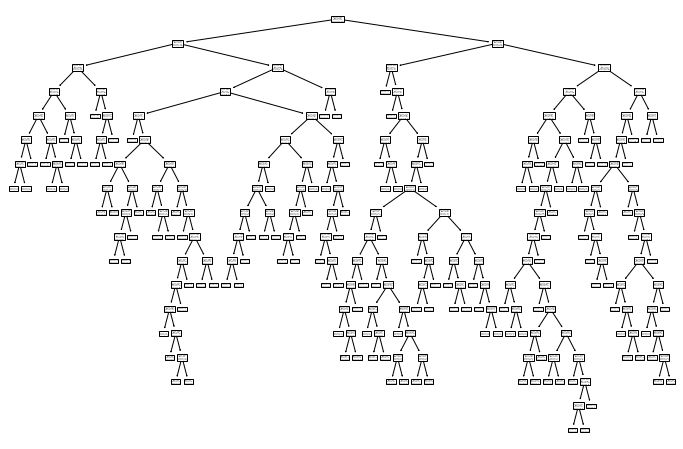

In [100]:
#Visualizing the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model_tree);

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179





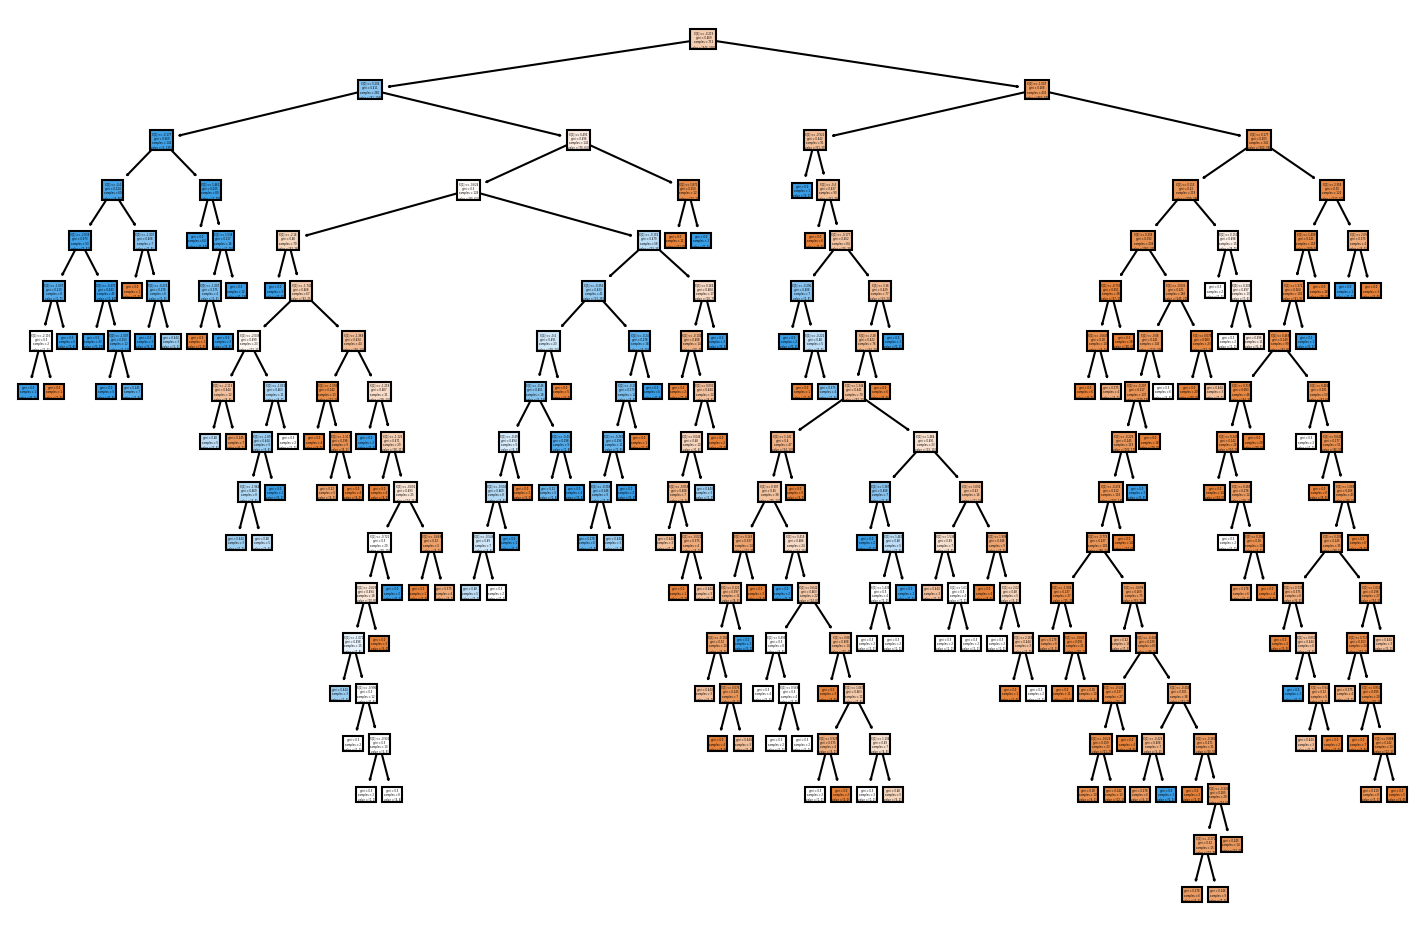

In [101]:
#Reporting results
def report_model(model):
    model_preds = model.predict(X_test_std)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True);
report_model(model_tree)